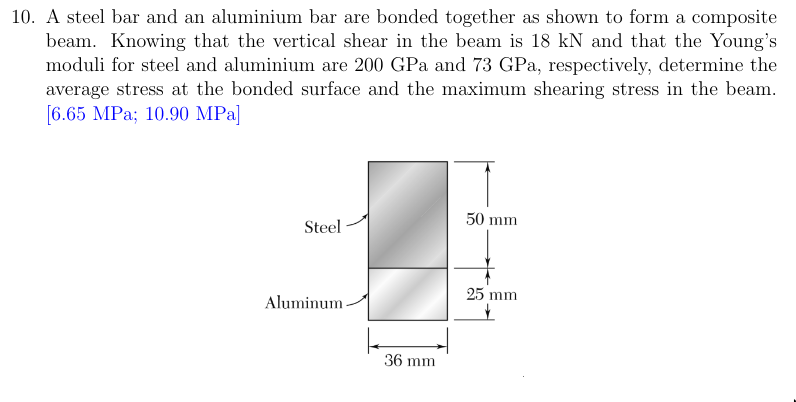

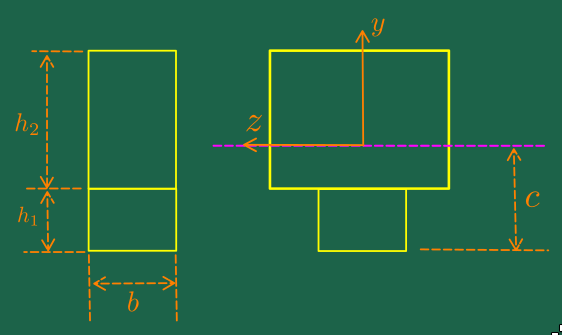

The ratio of the Young's modulus of steel to that of aluminium is $n = E_{\rm steel}/E_{\rm Al}$

Area of aluminium section is $A_1 = bh_1$
Distance of the centroid of the aluminium section from the base is $y_1 = h_1/2$

Area of the transformed steel section is $A_2 = nbh_2$
Distance of the centroid of the steel section from the base is $y_2 = (h_1 + h_2/2)$

The neutral axis will pass through the centroid of the overall section. 
Let the neutral axis be located at a distance of $c$ from the base. Then,

$A_1 y_1 + A_2 y_2 = c (A_1 + A_2)$

In [1]:
E_steel = 200e9
E_Al = 73e9
n = E_steel/E_Al

b = 36
h1 = 25
h2 = 50

A1 = b*h1
y1 = h1/2

A2 = n*b*h2
y2 = h1 + h2/2

c = (A1*y1 + A2*y2)/(A1+A2)
display(c)

44.21247357293869

The maximum shearing stress will occur at the neutral axis. 

So, we need to determine the shear stress (using the shear stress formula) at the neutral axis and at the interface.

The distance of the centroid of the aluminium section from the neutral axis: $d_1 = |c-h_1/2|$

The area moment of inertia of the aluminium section is: $I_1 = \dfrac{1}{12} b h_1^3 + A_1 d_1^2$

<br><br>
The distance of the centroid of the transformed steel section from the neutral axis: $d_2 = |h_1 + h_2/2 - c|$

The area moment of inertia of the transformed steel section is: $I_2 = \dfrac{1}{12} nbh_2^3 + Ad_2^2 d_2^2$

<br><br>
The area moment of inertia of the overall section is $I = I_1 + I_2$

In [2]:
d1 = abs(c - h1/2)
I1 = (1/12)*b*h1**3 + A1*d1**2

d2 = abs(h1+h2/2-c)
I2 = (1/12)*n*b*h2**3 + A2*d2**2

I = I1 + I2  #Units of mm^4
display(I)

2144568.2433606535

__At the neutral axis:__

Area of the part above the neutral axis: $A_{\rm NA} = (nb)(h_1 + h_2 - c)$

Centroid of the part above the neutral axis, referred to the neutral axis: $y_{\rm NA} = \dfrac{1}{2}(h_1 + h_2 - c)$

$Q = A_{\rm NA} y_{\rm NA}$

The thickness at the neutral axis is $t = nb$

Using $\dfrac{VQ}{It}$ gives us the shear stress at the neutral axis for the transformed section. To obtain the final shear stress for the untransformed section we need to multiply by $n$. 

In [3]:
A_NA = n*b*(h1+h2-c)
y_NA = (h1+h2-c)/2
Q_NA = A_NA*y_NA   #Units of mm^3
t_NA = n*b

V = 18e3

tau_NA_dash = V*Q_NA/(I*t_NA)
tau_NA = n*tau_NA_dash  #Units of N/mm^2 or, equivalently, MPa
display(tau_NA)

10.898315330042484

__At the interface of steel and aluminium:__

For this, we can proceed either from the top or from the bottom. The magnitude of the shear stress will be the same in both cases. However, calculating $Q$ from the bottom is easier because that would mean just considering the aluminium section. 

Centroid of the aluminium section referred to the neutral axis is: $y_{\rm int} = c - h_1/2$. 

Area of the aluminium section was already found out earlier as: $A_{\rm int} = A_1$

$Q_{\rm int} = A_{\rm int} y_{\rm int}$

The thickness at the interface (since we are proceeding from the bottom) is: $t_{\rm int} = b$

Using $\dfrac{VQ_{\rm int}}{It_{\rm int}}$ gives us the shear stress at the interface. This time, we do NOT need to multiply by $n$ because we are doing our calculations starting from the bottom which was not transformed. 

In [4]:
y_int = c - h1/2
Q_int = A1*y_int #Units of mm^3
t_int = b

tau_int = V*Q_int/(I*t_int)  #Units of N/mm^2 or, equivalently, MPa
display(tau_int)

6.654305896770902